In [20]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('housing.csv')
target = 'median_house_value'
df = pd.get_dummies(df)

In [22]:
# Regresion lineal simple total rooms, guarda predicciones en df
X = df[['total_rooms']]
y= df[target]

model = linear_model.LinearRegression().fit(X,y)

df['predicciones_lineal'] = model.predict(X)

In [26]:
# Regresion polinomial grado 2
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)
df['predicciones_poly2'] = model.predict(X_poly)


In [28]:
# Regresion polinomial grado 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)
df['predicciones_poly3'] = model.predict(X_poly)


In [30]:
# Regresion polinomial grado 4
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)
df['predicciones_poly4'] = model.predict(X_poly)

In [40]:
# Bivariado de total rooms 
df['bins'] = pd.qcut(df['total_rooms'], q = 10, labels = False) +1 

In [42]:
# Bivariado vs regresion lineal 
grouped = df.groupby('bins').mean()

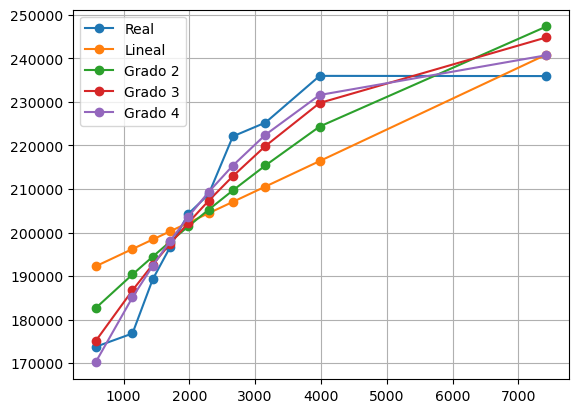

In [52]:
# Bivariado
plt.plot(grouped.total_rooms.values, grouped.median_house_value.values, marker = "o", label="Real")
plt.plot(grouped.total_rooms.values,
         grouped.predicciones_lineal.values, marker="o", label="Lineal")
plt.plot(grouped.total_rooms.values,
         grouped.predicciones_poly2.values, marker="o", label="Grado 2")
plt.plot(grouped.total_rooms.values,
         grouped.predicciones_poly3.values, marker="o", label="Grado 3")
plt.plot(grouped.total_rooms.values,
         grouped.predicciones_poly4.values, marker="o", label="Grado 4")
plt.grid()
plt.legend()

### Crea una regresión polinomial con todos y has cross validación, obten el R2 

In [56]:
df = pd.read_csv('housing.csv')
target = 'median_house_value'
df = pd.get_dummies(df)

df['total_bedrooms'] = df.total_bedrooms.fillna(df.total_bedrooms.mean())

In [58]:
# Simple

In [71]:
X = df.copy()
X = X.drop(target, axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

model = linear_model.LinearRegression().fit(X_train,y_train)
predicciones = model.predict(X_test)
r2_score(y_pred=predicciones, y_true=y_test)


0.6257351821159713

In [75]:
# Grado 2

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformar X a características polinómicas
X_test_poly = poly_features.fit_transform(X_test) 

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

predicciones = model.predict(X_test_poly)
r2_score(y_pred=predicciones, y_true=y_test)

0.6620359405729486

In [83]:
# Grado 3

degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformar X a características polinómicas
X_test_poly = poly_features.fit_transform(X_test) 

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

predicciones = model.predict(X_test_poly)
r2_score(y_pred=predicciones, y_true=y_test)

-3.010005345991517

In [23]:
# Grado 4
